In [1]:
from glob import glob
import torch
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
import tqdm

from utils import *

In [2]:
from gym.wrappers import TimeLimit
from env import LibrariesEnv
data_files = glob('data/qualification_round_2020.in/*.txt')
data_file = data_files[0]  # example

train_env = LibrariesEnv(data_file)
train_env = TimeLimit(train_env, train_env.total_days)

In [3]:
SEED = 1234

train_env.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

In [4]:
input_dim = train_env.observation_space.shape[0] * train_env.observation_space.shape[1]
hidden_dim = 32
output_dim = train_env.action_space.n

In [5]:
device = torch.device('cpu')

In [6]:
torch.autograd.set_detect_anomaly(True)

n_runs = 5
max_episodes = 300
discount_factor = 0.99

train_rewards = torch.zeros(n_runs, max_episodes)
test_rewards = torch.zeros(n_runs, max_episodes)
device = torch.device('cpu')

for run in range(n_runs):

    policy = MLP(input_dim, hidden_dim, output_dim)
    policy = policy.to(device)
    policy.apply(init_weights)
    optimizer = optim.Adam(policy.parameters(), lr=1e-2)

    for episode in tqdm.tqdm(range(max_episodes), desc=f'Run: {run}'):

        loss, train_reward = train(train_env, policy, optimizer, discount_factor, device)
        print(train_env.action_space.taken_actions)

        train_rewards[run][episode] = train_reward

Run: 0:   0%|          | 0/300 [00:00<?, ?it/s]C:\Users\rvain\anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: Error detected in SoftmaxBackward. Traceback of forward call that caused the error:
  File "C:\Users\rvain\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\rvain\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\rvain\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\rvain\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\rvain\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\Users\rvain\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\rvain\anaconda3\lib\asynci

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [2]], which is output 0 of SoftmaxBackward, is at version 1; expected version 0 instead. Hint: the backtrace further above shows the operation that failed to compute its gradient. The variable in question was changed in there or anywhere later. Good luck!

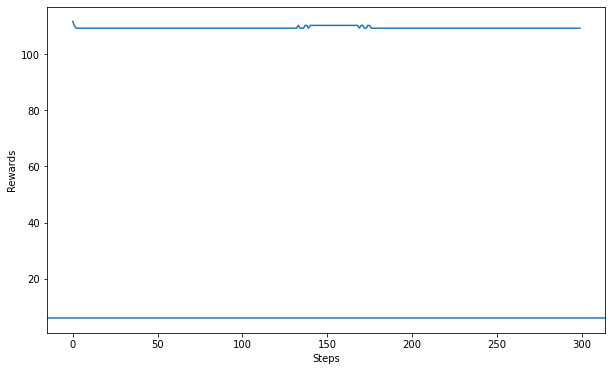

In [7]:
idxs = range(max_episodes)
fig, ax = plt.subplots(1, figsize=(10,6))
plt.axhline(y=train_env.scores.sum())
ax.plot(idxs, train_rewards.mean(0))
# ax.fill_between(idxs, train_rewards.min(0).values, train_rewards.max(0).values, alpha=0.1)
ax.set_xlabel('Steps')
ax.set_ylabel('Rewards');

In [8]:
train_rewards.mean(1)

tensor([119.9333, 102.1000, 120.0000, 102.0233, 102.6000])

In [9]:
train_rewards

tensor([[107., 113., 120.,  ..., 120., 120., 120.],
        [120., 114., 102.,  ..., 102., 102., 102.],
        [120., 120., 120.,  ..., 120., 120., 120.],
        [109., 102., 102.,  ..., 102., 102., 102.],
        [102., 102., 102.,  ..., 102., 102., 102.]])

In [7]:
%debug


> c:\users\rvain\anaconda3\lib\site-packages\torch\distributions\categorical.py(107)sample()
    105             sample_shape = torch.Size(sample_shape)
    106         probs_2d = self.probs.reshape(-1, self._num_events)
--> 107         samples_2d = torch.multinomial(probs_2d, sample_shape.numel(), True).T
    108         return samples_2d.reshape(self._extended_shape(sample_shape))
    109 

